American Samoa 0.0
Guam 0.0
Northern Mariana Islands 0.0
Puerto Rico 0.0
Virgin Islands 1.0
Alabama 327.0
Alaska 3.0
Arizona 1136.0
Arkansas 80.0
California 1381.0
Colorado 69.0
Connecticut 65.0
Delaware 61.0
District of Columbia 13.0
Florida 1580.0
Georgia 469.0
Hawaii 6.0
Idaho 42.0
Illinois 228.0
Indiana 135.0
Iowa 78.0
Kansas 34.0
Kentucky 74.0
Louisiana 308.0
Maine 7.0
Maryland 126.0
Massachusetts 201.0
Michigan 87.0
Minnesota 72.0
Mississippi 248.0
Missouri 109.0
Montana 17.0
Nebraska 32.0
Nevada 140.0
New Hampshire 18.0
New Jersey 251.0
New Mexico 64.0
New York 265.0
North Carolina 298.0
North Dakota 12.0
Ohio 261.0
Oklahoma 75.0
Oregon 50.0
Pennsylvania 227.0
Rhode Island 0.0
South Carolina 514.0
South Dakota 13.0
Tennessee 223.0
Texas 1852.0
Utah 43.0
Vermont 0.0
Virginia 113.0
Washington 70.0
West Virginia 7.0
Wisconsin 70.0
Wyoming 0.0
done


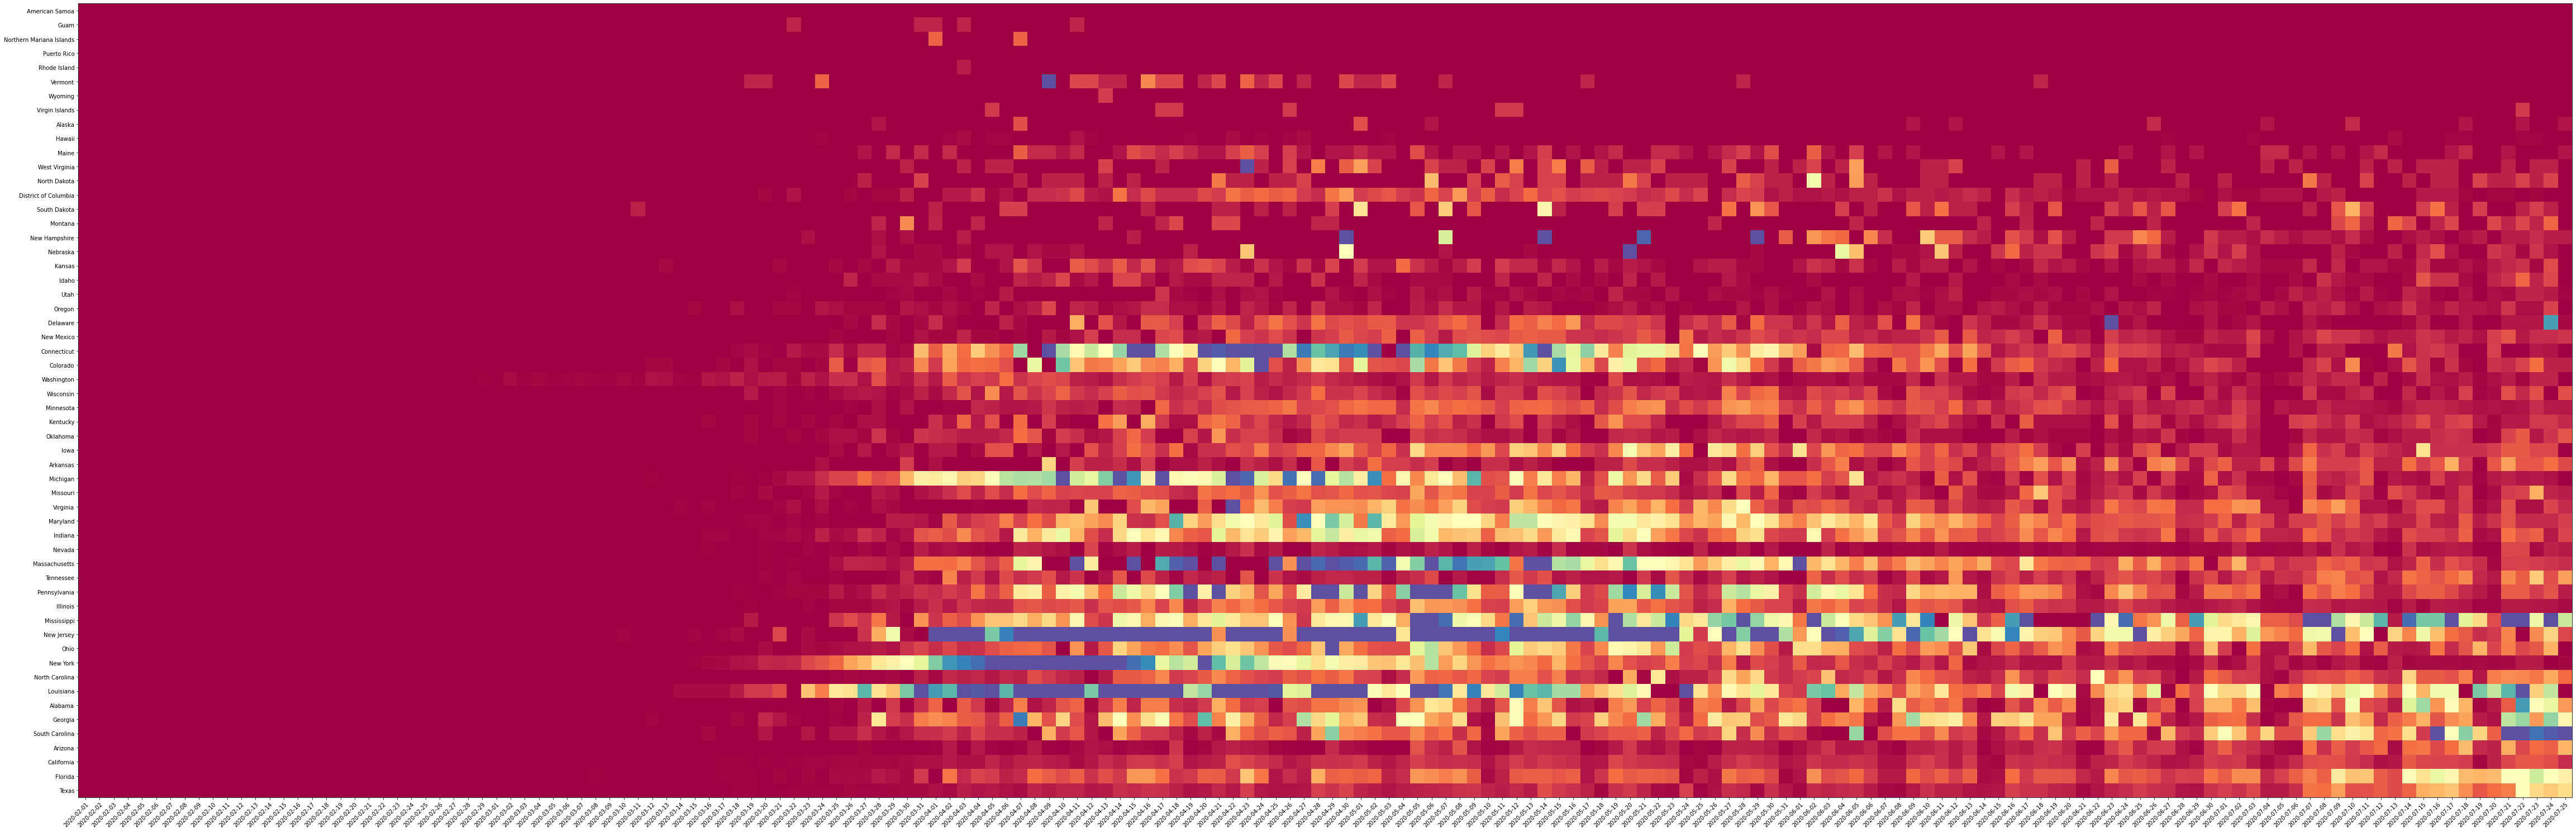

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

max_d_p1m = 100

# data has one row per day for all counties
data = pd.read_csv("us_deaths.csv", parse_dates=True, dayfirst=False) 
# remove lines with 0 population
data = data[data.Population>0]

us_states = data['Province/State'].unique()
population = {}
for state in us_states:
    maxval = data[data['Province/State']==state][['Population']].max()
    population[state] = int(maxval)
dates = data['Date'].unique()[10:]
dpd=[]

pos = 0
order = []
for state in us_states:
    s_data = data[data['Province/State']==state][['Date','Case']]
    s_data = s_data.groupby('Date').sum()
    # ordner by # last 2 weeks
    summe = s_data['Case'].diff(1)[-14:].sum()
    print(state,summe)
    order.append((pos,summe))
    pos = pos + 1
    l = s_data['Case'].diff(1).tolist()[10:]
    # leave out negative value
    pop = population[state]
    l = [d if d>0 else 0 for d in l]
    l = [(1000000*d/pop) if (1000000*d/pop)<max_d_p1m else max_d_p1m for d in l]
#    l = [d if d<300 else 300 for d in l]
#    l = [math.sqrt(d) if (d>0 and d<300) else 0 for d in l]
    # fix freak data in New Jersey
#    l = [d if d<200 else np.nan for d in l]
    dpd.append(l)

# sort by count
order = sorted( order, key=lambda x: x[1])
order = [x for (x,_) in order]

us_states = [us_states[i] for i in order]
dpd = [dpd[i] for i in order]

dpd = np.array(dpd)

fig, ax = plt.subplots()
im = ax.imshow(dpd, cmap="Spectral")

# We want to show all ticks...
ax.set_xticks(np.arange(len(dates)))
ax.set_yticks(np.arange(len(us_states)))
# ... and label them with the respective list entries
ax.set_xticklabels(dates)
ax.set_yticklabels(us_states)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(us_states)):
#    for j in range(len(dates)):
#        text = ax.text(j, i, dpd[i, j],
#                       ha="center", va="center", color="w")


fig = plt.gcf()
fig.set_size_inches(80, 30)
fig.savefig('d.jpeg', dpi=100)
print("done")